In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.utils import resample
from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from joblib import dump


In [2]:
##

In [3]:
## Load dataset
california_housing=fetch_california_housing()
print(california_housing.DESCR)



.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
##Convert dataset into pandaDataframe
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
California_dataset=pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
California_dataset['Price']=california_housing.target
California_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Visualization and correlation

In [6]:
correlation=California_dataset.corr()
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


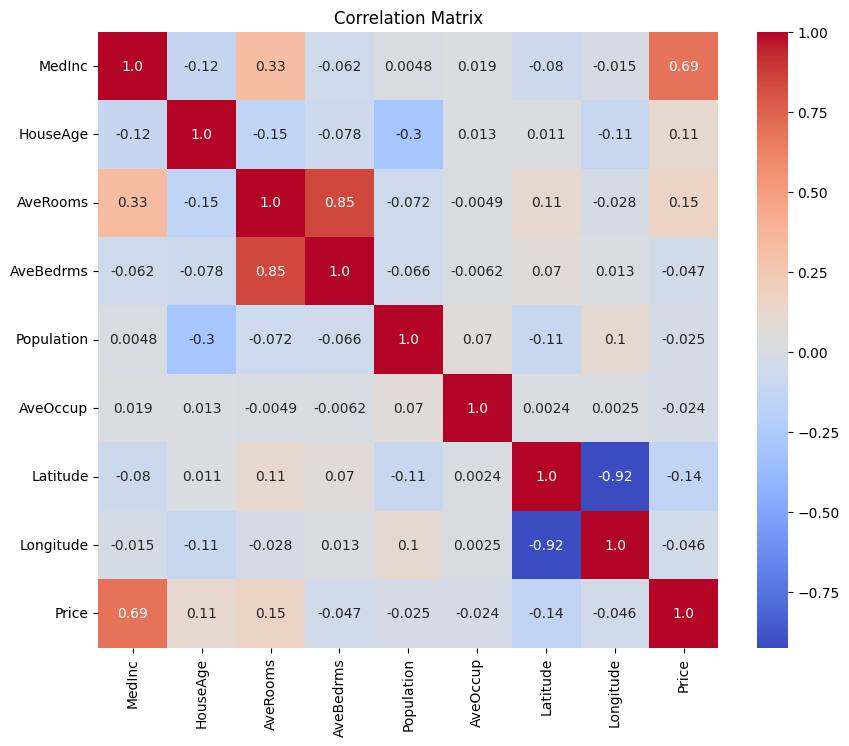

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
## Check multi-collinearity
# Assuming `data` is your DataFrame
X = add_constant(California_dataset)  # Adds a constant term to the predictor
VIFs = pd.Series([variance_inflation_factor(X.values, i) 
                  for i in range(X.shape[1])], 
                 index=X.columns)
print(VIFs)

const         19685.429049
MedInc            3.813979
HouseAge          1.268150
AveRooms          8.477254
AveBedrms         7.173226
Population        1.138164
AveOccup          1.011274
Latitude         10.842087
Longitude        10.407641
Price             2.539571
dtype: float64


## Regression Models

#### Ridge Regression

In [9]:
## Split the dataset into training and test sets
training_dataset, test_dataset=train_test_split(California_dataset, test_size=0.2, random_state=42)
X_train=training_dataset.drop(columns=['Price'])
y_train=training_dataset['Price']
X_test=test_dataset.drop(columns=['Price'])
y_test=test_dataset['Price']
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)
y_predict=ridge_model.predict(X_test)

##Evaluate the model
mse=mean_squared_error(y_test,y_predict)
print(f"Mean squared error:{mse}")


Mean squared error:0.5558034669932209


#### Linear regression

In [10]:
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
y_prediction_linear=linear_model.predict(X_test)
mse_linear=mean_squared_error(y_prediction_linear,y_test)
print(f"Mean square error: {mse_linear}")

Mean square error: 0.555891598695244


In [13]:
ridge_model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object)

#### We will use ridge regression


In [12]:
## Saving scikit-learn model
dump(ridge_model, 'ridge_model.joblib')

['ridge_model.joblib']